In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import seaborn as sns


In [2]:
from google.colab import files
file=files.upload()

Saving japan.csv to japan.csv


In [3]:
df=read_csv("japan.csv",header=0)


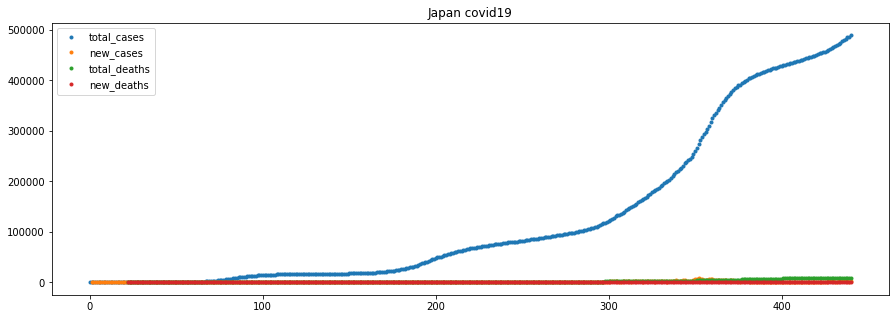

In [4]:
color_pal = ["#F8766D", "#66C2A5", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(15,5),title='Japan covid19')
plt.show()

In [5]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Japan,2020-01-22,2,NaN,NaN,NaN
1,Japan,2020-01-23,2,0.0,NaN,NaN
2,Japan,2020-01-24,2,0.0,NaN,NaN
3,Japan,2020-01-25,2,0.0,NaN,NaN
4,Japan,2020-01-26,4,2.0,NaN,NaN


In [6]:
df.dtypes

location         object
date             object
total_cases       int64
new_cases       float64
total_deaths    float64
new_deaths      float64
dtype: object

In [7]:
df.shape

(441, 6)

In [8]:
new_df=pd.DataFrame(df,columns=["date","total_cases"])
new_df.head()

,date,total_cases
0,2020-01-22,2
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,4


In [9]:
new_df.columns=['ds','y']
new_df.head()


,ds,y
0,2020-01-22,2
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,4


In [10]:
new_df['ds']= pd.to_datetime(new_df['ds'])
new_df.head()

,ds,y
0,2020-01-22,2
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,4


In [11]:
train=new_df.drop(new_df.index[-150:])

In [12]:
train.shape

(291, 2)

In [13]:
train.tail()

,ds,y
286,2020-11-03,103309
287,2020-11-04,103928
288,2020-11-05,104964
289,2020-11-06,106136
290,2020-11-07,107439


In [14]:
model =Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


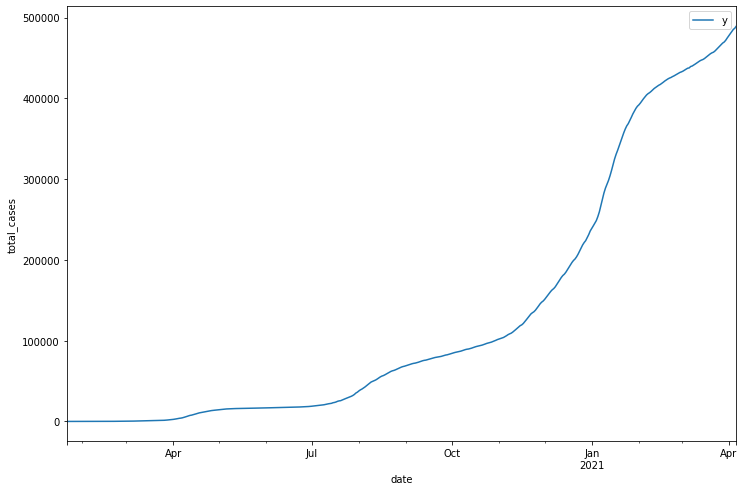

In [15]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('total_cases')
ax.set_xlabel('date')

plt.show()

In [16]:
future = model.make_future_dataframe(periods=20, freq='D')
prediction = model.predict(future)
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
304,2020-11-21,112066.113963,110863.278482,113436.276048
305,2020-11-22,112502.313843,111173.608387,114055.397039
306,2020-11-23,112901.793776,111298.578982,114585.316030
307,2020-11-24,113413.835491,111713.906782,115464.387527
308,2020-11-25,113968.037660,112208.006383,116196.723629
309,2020-11-26,114580.019943,112487.260699,117046.205274
310,2020-11-27,115182.474312,112861.086538,117871.951980


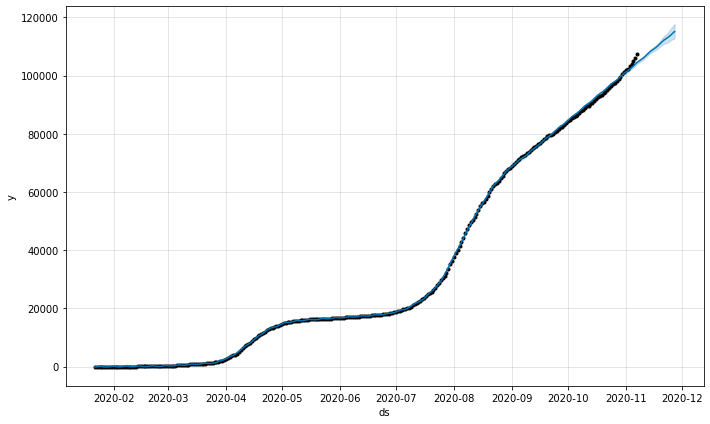

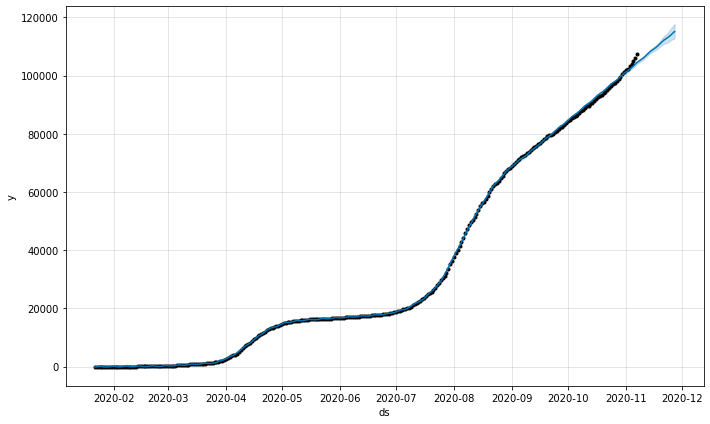

In [17]:
model.plot(prediction)

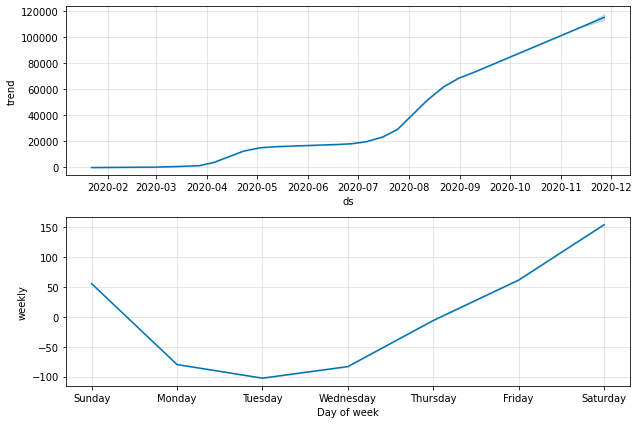

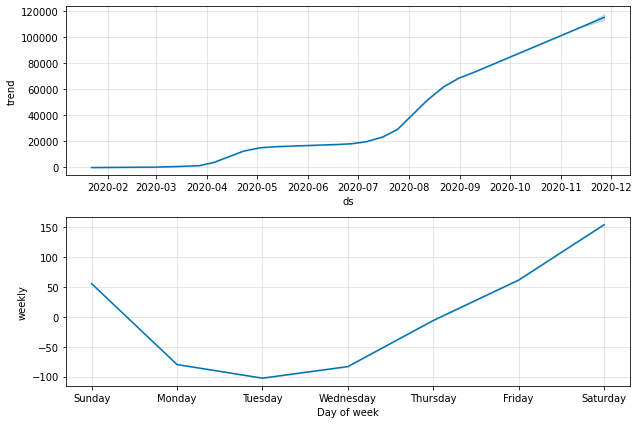

In [18]:
model.plot_components(prediction)

In [19]:
new_df=df[['date','new_cases']]
new_df['ds']=new_df['date']
new_df['y']=new_df['new_cases']
new_df.drop(columns=['date','new_cases'], inplace=True)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,ds,y
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,2.0


In [20]:
from fbprophet import Prophet
model=Prophet()
model.fit(new_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


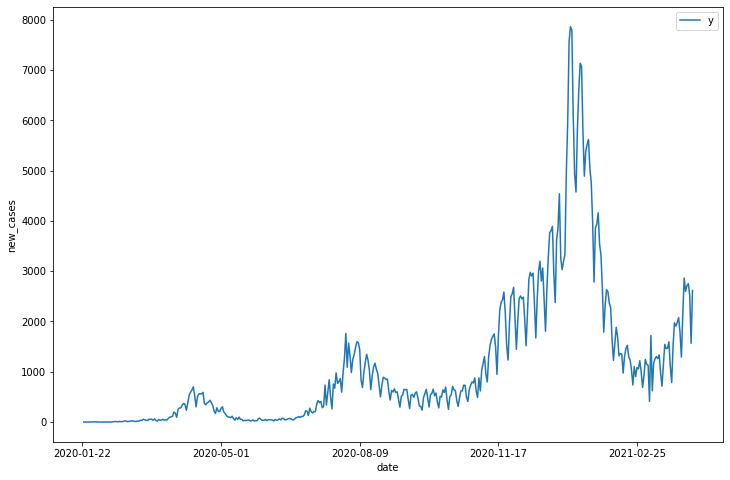

In [21]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('new_cases')
ax.set_xlabel('date')
plt.show()


In [28]:
future = model.make_future_dataframe(periods=0)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [29]:
forecast=model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
434,2021-03-31,1439.281794,428.180817,2378.757268
435,2021-04-01,1523.823363,535.685250,2614.734557
436,2021-04-02,1447.977863,491.043398,2372.297914
437,2021-04-03,1434.134168,486.040438,2489.417169
438,2021-04-04,1191.198777,226.646797,2167.333333
439,2021-04-05,889.915080,-116.530941,1926.768635
440,2021-04-06,1145.511665,131.226715,2107.182476


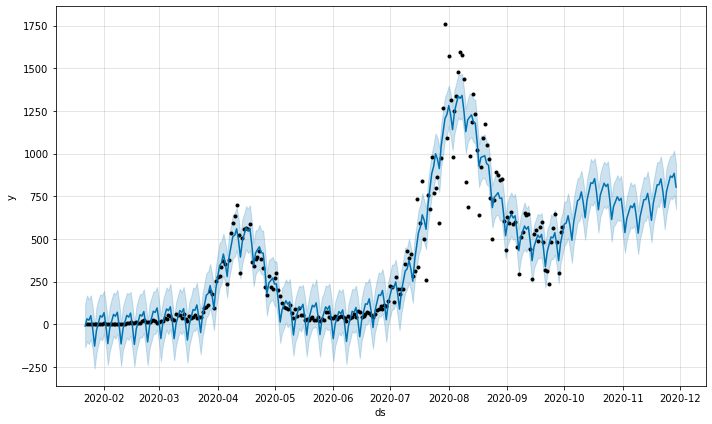

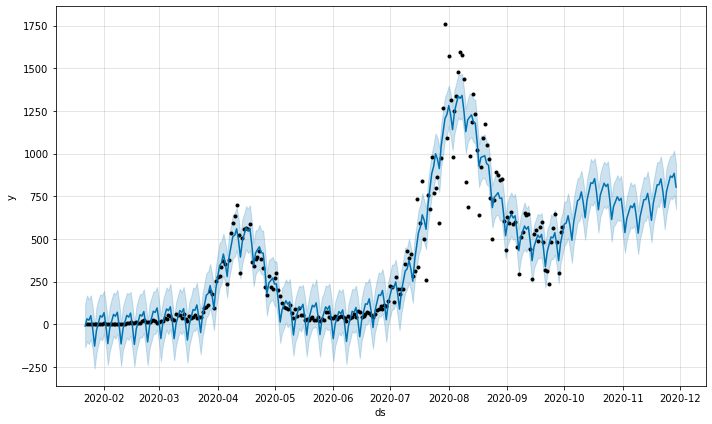

In [ ]:
model.plot(prediction)

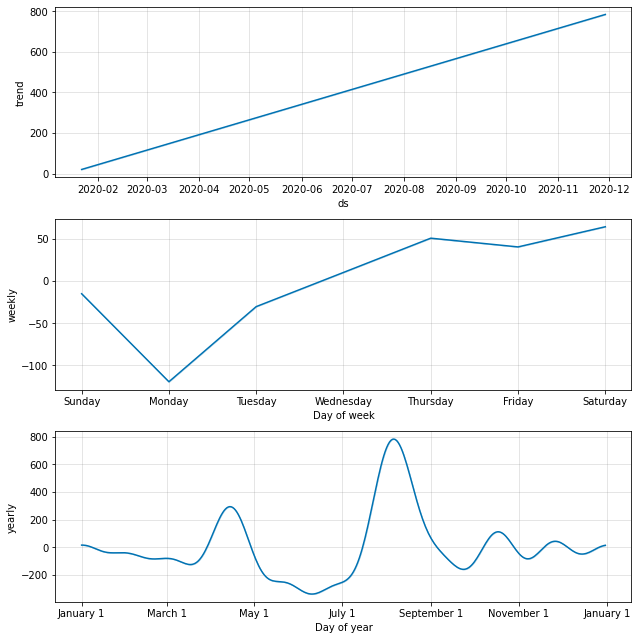

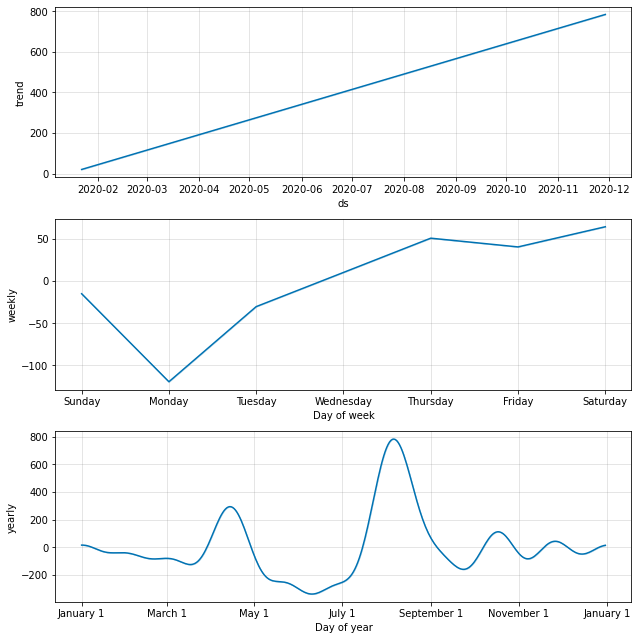

In [ ]:
model.plot_components(prediction)